In [ ]:
import inverse_geometry
import inverse_geometry_test
import old_inverse_geometry
from function_profiler import FunctionProfiler
from tools import setupwithmeshcat

In [ ]:
profiler = FunctionProfiler()

In [ ]:
@profiler.profile("Solution A")
def computeqgrasppose_a(robot, qcurrent, cube, cubetarget, viz=None):
    return inverse_geometry.computeqgrasppose(robot, qcurrent, cube, cubetarget, viz)

@profiler.profile("Solution B")
def computeqgrasppose_b(robot, qcurrent, cube, cubetarget, viz=None):
    return old_inverse_geometry.computeqgrasppose(robot, qcurrent, cube, cubetarget, viz)

In [ ]:
robot, cube, viz = setupwithmeshcat()
inverse_geometry_test.random_tests(robot, cube, viz, interactive=False, iters=10, computeqgrasppose=computeqgrasppose_a)
inverse_geometry_test.random_tests(robot, cube, viz, interactive=False, iters=10, computeqgrasppose=computeqgrasppose_b)

In [ ]:
profiler.plot("Solution A")

In [ ]:
profiler.plot("Solution B")

In [1]:
from path import computepath, computepathwithcubepos
from tools import setupwithmeshcat
from config import CUBE_PLACEMENT, CUBE_PLACEMENT_TARGET
from inverse_geometry import computeqgrasppose
import numpy as np

# Seed the random number generator
np.random.seed(42)

robot, cube, viz = setupwithmeshcat()



pybullet build time: Oct 14 2023 15:43:53


Wrapper tries to connect to server <tcp://127.0.0.1:6000>
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/


In [2]:
import matplotlib.pyplot as plt

def plot_path_2d(iters=10, step_size=0.05, color='blue', neighborhood_radius=0.1, collision_samples=3, max_neighbors=10, max_iterations=100, post_goal_iterations=0, shortcut_iterations=0):
    for i in range(iters):
        q = robot.q0.copy()
        q0,successinit = computeqgrasppose(robot, q, cube, CUBE_PLACEMENT, viz)
        qe,successend = computeqgrasppose(robot, q, cube, CUBE_PLACEMENT_TARGET,  viz)
        if not(successinit and successend):
            print ("error: invalid initial or end configuration")
        print(f"Pass {i} of {iters}")
        path = computepathwithcubepos(q0,qe,CUBE_PLACEMENT, CUBE_PLACEMENT_TARGET, robot, cube, viz, step_size=step_size, neighborhood_radius=neighborhood_radius, collision_samples=collision_samples, max_neighbors=max_neighbors, max_iterations=max_iterations, post_goal_iterations=post_goal_iterations, shortcut_iterations=shortcut_iterations)
        path = [node[0] for node in path]
        plt.axis([-0.4, 0.2, 0.9, 1.3])
        plt.plot([node[1] for node in path], [node[2] for node in path], color=color, linewidth=2)
    plt.show()

Pass 0 of 10
🦾 Starting RTT*
✅ Exploring search space: Path found!          
✅ Local path optimization: Done! Path length reduced by: 0%            
Pass 1 of 10
🦾 Starting RTT*
✅ Exploring search space: Path found!          
✅ Local path optimization: Done! Path length reduced by: 0%            
Pass 2 of 10
🦾 Starting RTT*
✅ Exploring search space: Path found!          
✅ Local path optimization: Done! Path length reduced by: 0%            
Pass 3 of 10
🦾 Starting RTT*
✅ Exploring search space: Path found!          
✅ Local path optimization: Done! Path length reduced by: 0%            
Pass 4 of 10
🦾 Starting RTT*
✅ Exploring search space: Path found!          
✅ Local path optimization: Done! Path length reduced by: 0%            
Pass 5 of 10
🦾 Starting RTT*
✅ Exploring search space: Path found!          
✅ Local path optimization: Done! Path length reduced by: 0%            
Pass 6 of 10
🦾 Starting RTT*
✅ Exploring search space: Path found!          
✅ Local path optimization: Do

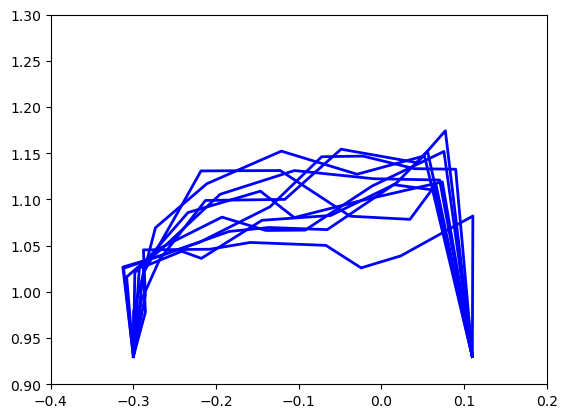

In [3]:
plot_path_2d()

Pass 0 of 10
🦾 Starting RTT*
✅ Exploring search space: Path found!          
✅ Local path optimization: Done! Path length reduced by: 0%            
Pass 1 of 10
🦾 Starting RTT*


KeyboardInterrupt: 

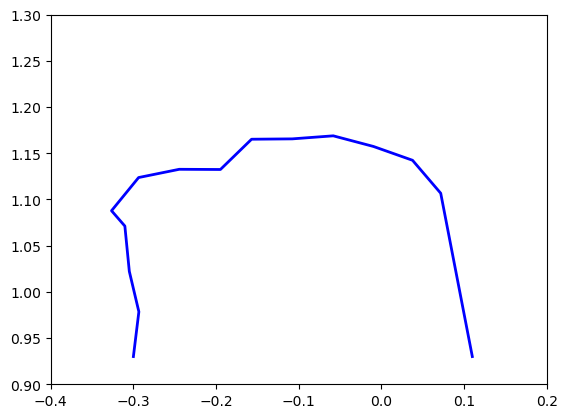

In [4]:
plot_path_2d(neighborhood_radius=1, max_neighbors=1)